# Data Science Project - Analysis of Real Estate Data in the US

# Introduction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
re_data = pd.read_csv("real_estate_db.csv", encoding = "ISO-8859-1")

In [3]:
re_data.shape

(39030, 80)

In [4]:
re_data.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

# Part 1. Cleaning

## The dataset contains 79 columns, so we will take only the most interesting ones that we find useful for our data exploration.

In [5]:
re_data = re_data[['state','city','zip_code','lat','lng','pop','male_pop','female_pop','rent_mean','rent_median',
              'hc_mean', 'hc_mortgage_mean','hc_mortgage_median', 'hi_mean','hi_median','family_mean',
              'home_equity_second_mortgage', 'second_mortgage', 'home_equity',
              'debt', 'hs_degree', 'male_age_mean', 'female_age_mean', 'pct_own','married'
             ]]

In [6]:
re_data.isna().sum().nlargest(20)

hc_mean                        890
hc_mortgage_mean               841
hc_mortgage_median             841
home_equity_second_mortgage    677
second_mortgage                677
home_equity                    677
debt                           677
rent_mean                      462
rent_median                    462
family_mean                    434
hi_mean                        390
hi_median                      390
pct_own                        390
female_age_mean                302
hs_degree                      275
married                        275
male_age_mean                  273
state                            0
city                             0
zip_code                         0
dtype: int64

In [7]:
re_data.dropna(inplace=True)

## We will drop Puerto Rico State, as it's economy is significantly different from other states

In [8]:
re_data = re_data[re_data.state != 'Puerto Rico']

## Drop places with mean rent < 500 USD. Not realistic or really small village areas

In [9]:
re_data = re_data[re_data.rent_mean > 500]

In [10]:
re_data.rent_mean.nsmallest()

32076    500.01272
30717    500.02145
17906    500.13603
32069    500.38186
11155    500.54241
Name: rent_mean, dtype: float64

## We found not correct values where rent_mean is 3962.34229 due to bad record

In [11]:
re_data.groupby(['state'])[ 'rent_mean'].max().sort_values(ascending=False).nlargest(15)

state
New York                3962.34229
Michigan                3962.34229
Hawaii                  3962.34229
California              3962.34229
Florida                 3962.34229
Texas                   3962.34229
Tennessee               3962.34229
Virginia                3829.43383
District of Columbia    3661.71463
Connecticut             3600.28736
Missouri                3509.17617
Arizona                 3432.87803
New Jersey              3408.15112
Maryland                3341.37301
Pennsylvania            3324.65000
Name: rent_mean, dtype: float64

## Excluding records where rent_mean is 3962.34229 

In [12]:
re_data = re_data[re_data.rent_mean <= 3962]

# Part 2. Findings

# 2.1 Top cities to build real estate for sale or to do house renovation and resale. 

We will be looking for cities where people have the highest income left and percentage of owned real estate is very high.

## Calculating income left. For this finding we will substract mortgage payments + house cost from income

In [13]:
re_data['income_left_mortgage'] = re_data['family_mean'] - re_data['hc_mortgage_mean']*12

In [14]:
re_data['pct_mortgage_income'] = (re_data['hc_mortgage_mean']*12)/re_data['family_mean']

In [15]:
inc_rent = re_data[['state','city', 'lat', 'lng', 'family_mean','rent_mean','pct_own','hc_mortgage_mean','income_left_mortgage','pct_mortgage_income']].groupby(['state','city']).mean()

## Top 10 Cities with the highest income left after mortgage payments and highest house ownership

In [16]:
high_income_owned = inc_rent.sort_values('income_left_mortgage', ascending = False).head(100).nlargest(10, 'pct_own')
high_income_owned

lat        lng   family_mean  \
state         city                                                     
Maryland      Dayton              39.194850 -76.986896  161730.63107   
Virginia      Fairfax Station     38.723095 -77.303328  184314.86334   
Wisconsin     River Hills         43.173480 -87.933849  168925.36599   
Michigan      Oakland             42.739277 -83.193505  165491.79962   
Massachusetts Sudbury             42.374693 -71.432654  175741.81914   
              Carlisle            42.536620 -71.361832  175281.45094   
New York      Chappaqua           41.199260 -73.761107  194949.05336   
New Jersey    Ramsey              41.054585 -74.146781  172074.56479   
New York      Jericho             40.807912 -73.570122  185188.19983   
New Jersey    Whitehouse Station  40.577045 -74.785656  171362.67350   

                                   rent_mean  pct_own  hc_mortgage_mean  \
state         city                                                        
Maryland      Dayton              1412.00000  0.99225        2973.78420   
Virginia      Fairfax Station     3538.22035  0.98473        3595.60138   
Wisconsin     River Hills         1651.12451  0.98030        3302.57442   
Michigan      Oakland             1863.00095  0.97947        2520.57811   
Massachusetts Sudbury             1073.12556  0.97377        3108.26445   
              Carlisle            1860.32089  0.97142        3416.55822   
New York      Chappaqua           1511.00589  0.96785        3906.24830   
New Jersey    Ramsey              1422.44726  0.96506        3209.64875   
New York      Jericho             2998.84959  0.96089        4207.82954   
New Jersey    Whitehouse Station  1609.45884  0.95891        3144.70440   

                                  income_left_mortgage  pct_mortgage_income  
state         city                                                           
Maryland      Dayton                      126045.22067             0.220647  
Virginia      Fairfax Station             141167.64678             0.234095  
Wisconsin     River Hills                 129294.47295             0.234606  
Michigan      Oakland                     135244.86230             0.182770  
Massachusetts Sudbury                     138442.64574             0.212238  
              Carlisle                    134282.75230             0.233902  
New York      Chappaqua                   148074.07376             0.240447  
New Jersey    Ramsey                      133558.77979             0.223870  
New York      Jericho                     134694.24535             0.272663  
New Jersey    Whitehouse Station          133626.22070             0.220214

## Plot for percentage of real estate owned

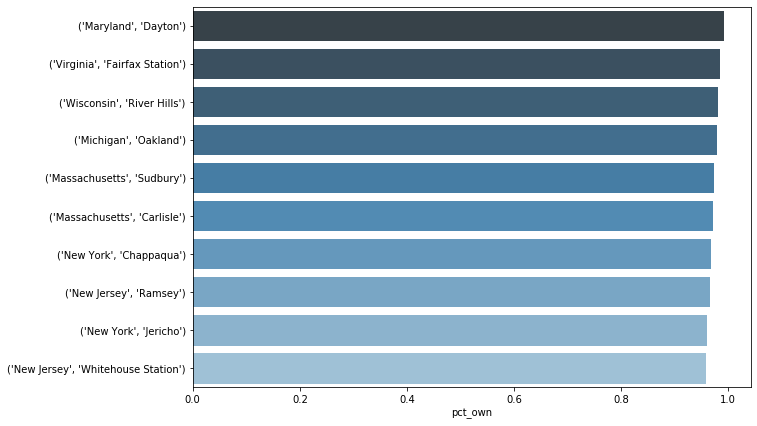

In [17]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x="pct_own", y=high_income_owned.index,palette="Blues_d", data=high_income_owned, ax=ax)

## Plot for income left

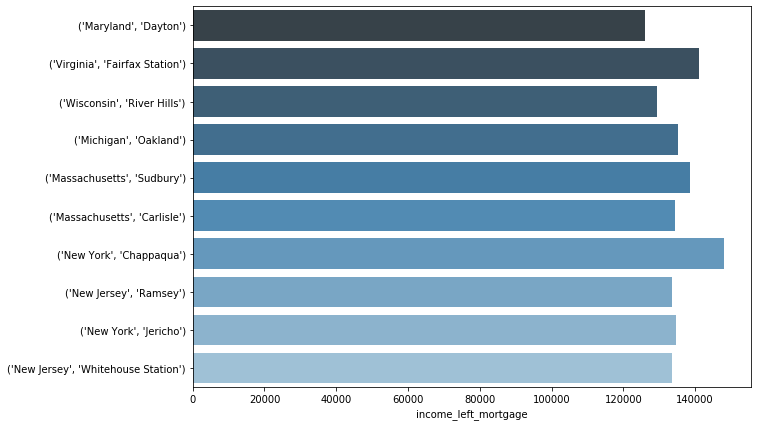

In [18]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x="income_left_mortgage", y=high_income_owned.index,palette="Blues_d", data=high_income_owned, ax=ax)

## Plot for how much percentage of yearly income take mortgage payments+owner costs

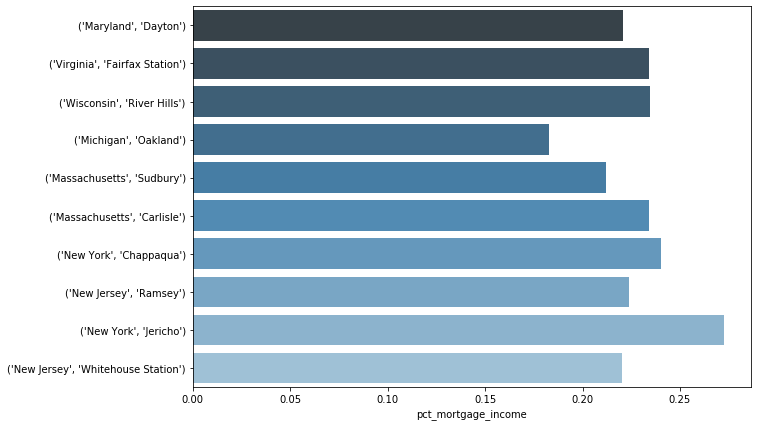

In [19]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x="pct_mortgage_income", y=high_income_owned.index,palette="Blues_d", data=high_income_owned, ax=ax)

## Calculating average mortgage payments percentage from income for the whole United States

In [20]:
re_data['pct_mortgage_income'].mean()

0.25819822741258613

## Managerial insights
We found top 10 cities where people prefer to own real estate and also have high income. We used income left after mortgage payments instead of just pure income to find those cities because the highest income left will show cities where real estate market is not yet on its high, as the percentages of yearly mortgage payments are small parts of people's salary. 

### We have the following business opportunities:
1. If the percentage of owned property is very high, it means that it's a perfect place to build houses for sale there, or do renovation + resale.
2. People income is high there, so there is a possibility to do higher deals on each house.
3. Real estate market is not on its highest point there, as in all of those cities mortgage payments percentage from income is smaller than US average. It can possibly be an indicator that there is still a possibility for prices to rise.


# 2.2 Top attractive cities to do rental business.

We define a city attractive for rental business where rent prices are high, so there is a high demand for real estate rent. Another important point is debt percentage, when it is high, it means that there is a big opportunity to receive a loan and establish a rental business.

Firstly, let's build a map of places with the highest debt in the USA.

In [21]:
px.set_mapbox_access_token('pk.eyJ1IjoiYWxleHZ6bmsiLCJhIjoiY2sza3ZqNmJ6MGUwbzNkbjN3NXM3b2FuZCJ9.aDeGkoLyAC0eiXB0mq4a3g')
fig = px.scatter_mapbox(re_data, lat="lat", lon="lng",size='rent_mean', color="debt",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=10, zoom=2)
fig.show()

In [22]:
re_data.groupby('city').mean().sort_values(by='debt', ascending=False).head(15)

zip_code        lat         lng           pop  \
city                                                                  
Higley            85297.000000  33.297078 -111.700288   5444.000000   
Stevenson Ranch   91381.000000  34.386084 -118.596430   6412.000000   
Rodeo             94572.000000  38.026408 -122.274457   3116.000000   
Ladera Ranch      92694.000000  33.555212 -117.626472   8861.333333   
Lake Dallas       75065.000000  33.135342  -97.068246   6531.000000   
Odenton           21113.000000  39.106351  -76.712454  11579.000000   
Mitchellville     20719.333333  38.931628  -76.776764   4627.666667   
Waldorf           20602.000000  38.600601  -76.894131   6345.250000   
Antelope          95843.000000  38.714488 -121.373310   5828.800000   
Aliso Viejo       92656.000000  33.571920 -117.731339   5982.600000   
South Riding      20152.000000  38.919226  -77.531514  10417.000000   
Chesapeake Beach  20732.000000  38.671786  -76.546547   3475.000000   
Plumas Lake       95961.000000  39.017753 -121.553109  12604.000000   
Haslet            76052.000000  32.938144  -97.370467  23196.000000   
District Heights  20747.000000  38.864134  -76.890994   3762.000000   

                      male_pop    female_pop    rent_mean  rent_median  \
city                                                                     
Higley             2598.000000   2846.000000  1641.534580  1646.000000   
Stevenson Ranch    3181.000000   3231.000000  2480.650100  2376.000000   
Rodeo              1558.000000   1558.000000  1162.884990  1005.000000   
Ladera Ranch       4437.000000   4424.333333  2089.100670  1915.666667   
Lake Dallas        2912.000000   3619.000000  1167.604480  1051.000000   
Odenton            5515.000000   6064.000000  1756.426350  1755.000000   
Mitchellville      2135.666667   2492.000000  2218.906757  2209.666667   
Waldorf            2972.750000   3372.500000  1544.848095  1553.125000   
Antelope           2681.000000   3147.800000  1330.957038  1286.600000   
Aliso Viejo        2931.000000   3051.600000  2113.138908  2070.200000   
South Riding       5340.000000   5077.000000  2320.965550  2274.000000   
Chesapeake Beach   1543.000000   1932.000000  1471.097130  1613.000000   
Plumas Lake        6225.000000   6379.000000  1342.127180  1484.000000   
Haslet            11072.000000  12124.000000  1602.071220  1504.000000   
District Heights   1624.000000   2138.000000  1064.674440  1079.000000   

                      hc_mean  hc_mortgage_mean  ...  second_mortgage  \
city                                             ...                    
Higley             451.849490       1617.411240  ...         0.064410   
Stevenson Ranch   1235.871280       3376.965650  ...         0.070930   
Rodeo              796.606160       3503.363440  ...         0.126240   
Ladera Ranch      1176.156510       3293.885540  ...         0.064010   
Lake Dallas        570.309740       1832.980550  ...         0.065880   
Odenton            536.177750       2092.146330  ...         0.048070   
Mitchellville      776.640037       2705.999147  ...         0.052657   
Waldorf            589.400402       2129.800290  ...         0.051306   
Antelope           422.825964       1688.587550  ...         0.085618   
Aliso Viejo        664.616346       2757.275328  ...         0.057118   
South Riding       722.348900       2791.388680  ...         0.083990   
Chesapeake Beach   493.246680       1929.757300  ...         0.048630   
Plumas Lake        473.486830       1655.154930  ...         0.048160   
Haslet             931.792740       1847.100910  ...         0.043530   
District Heights   427.666360       1493.757680  ...         0.074730   

                  home_equity      debt  hs_degree  male_age_mean  \
city                                                                
Higley               0.148470  0.961510   0.938170      32.090630   
Stevenson Ranch      0.286260  0.957570   0.956370      32.421960   
Rodeo                0.205670  0.9546

## Point 2.3 Age of people that are more likely to buy a house in the next 1-5 years. Cities where those people live.

In [23]:
df = re_data

In [24]:
df['age_mean'] = (df['male_age_mean'] + df['female_age_mean'])/2

In [25]:
df['age_mean_bin'] = pd.cut(df['age_mean'],[0,20,30,40,50,60,70,80])

(array([  133.,  1377.,  9609., 18194.,  6370.,   779.,   214.,    82.,
           61.,    29.]),
 array([18.92788 , 24.930396, 30.932912, 36.935428, 42.937944, 48.94046 ,
        54.942976, 60.945492, 66.948008, 72.950524, 78.95304 ]),
 <a list of 10 Patch objects>)

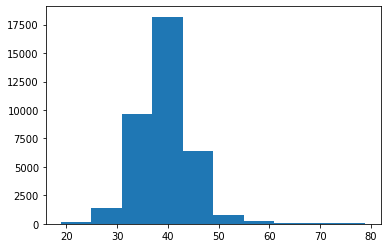

In [26]:
plt.hist(df['age_mean'])

In [27]:
df.groupby('age_mean_bin').mean()['pct_own']

age_mean_bin
(0, 20]     0.303108
(20, 30]    0.338653
(30, 40]    0.586495
(40, 50]    0.736868
(50, 60]    0.758806
(60, 70]    0.831657
(70, 80]    0.876943
Name: pct_own, dtype: float64

In [28]:
df['age_mean_bin_2'] = pd.cut(df['age_mean'],[25,30,35,40,45])

In [29]:
df.groupby('age_mean_bin_2').mean()['pct_own']

age_mean_bin_2
(25, 30]    0.362807
(30, 35]    0.492728
(35, 40]    0.625476
(40, 45]    0.732882
Name: pct_own, dtype: float64

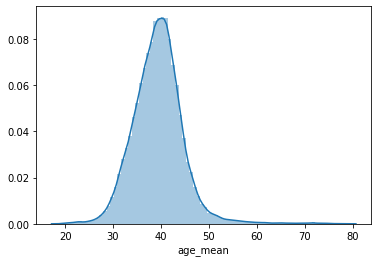

In [30]:
sns.distplot(df['age_mean'], bins=80)

In [31]:
target_df = df[(df.age_mean >= 30) & (df.age_mean <= 35) & (df.family_mean > 80000)]

In [32]:
target_df.head()

state       city  zip_code        lat         lng   pop  male_pop  \
4   Alaska  Anchorage     99504  61.217082 -149.767214  5981      3076   
5   Alaska  Anchorage     99504  61.217507 -149.744426  5476      2916   
16  Alaska  Anchorage     99508  61.191085 -149.803004  4481      2506   
18  Alaska  Anchorage     99504  61.188064 -149.733648  6296      3108   
19  Alaska  Anchorage     99507  61.173881 -149.848285  4738      2937   

    female_pop   rent_mean  rent_median  ...  hs_degree  male_age_mean  \
4         2905  1372.84472       1222.0  ...    0.95351       34.13110   
5         2560  1351.27532       1353.0  ...    0.87941       29.23608   
16        1975  1280.73904       1157.0  ...    0.95426       34.53681   
18        3188  1533.10798       1565.0  ...    0.97081       34.23956   
19        1801  1238.76313       1173.0  ...    0.92909       30.24230   

    female_age_mean  pct_own  married  income_left_mortgage  \
4          34.96611  0.56936  0.51034           58131.20810   
5          33.63770  0.45011  0.39429           60205.86121   
16         35.06603  0.54928  0.37523           79730.19092   
18         35.43599  0.63290  0.49034           78815.51749   
19         39.67440  0.50983  0.32504           70748.11778   

    pct_mortgage_income   age_mean  age_mean_bin  age_mean_bin_2  
4              0.282164  34.548605      (30, 40]        (30, 35]  
5              0.291123  31.436890      (30, 40]        (30, 35]  
16             0.238659  34.801420      (30, 40]        (30, 35]  
18             0.219381  34.837775      (30, 40]        (30, 35]  
19             0.223995  34.958350      (30, 40]        (30, 35]  

[5 rows x 30 columns]

In [33]:
target_cities = target_df.groupby('city').mean().sort_values(by='pct_own')

In [34]:
target_cities = target_cities[(target_cities.pct_own >= 0.25) & (target_cities.pct_own <= 0.7)]

In [35]:
target_cities.head(20)

zip_code        lat         lng     pop     male_pop  \
city                                                                        
San Marcos       78666.000000  29.880128  -97.946005  2667.0  1240.000000   
Costa Mesa       92626.000000  33.677903 -117.913630  6963.0  3459.000000   
Los Angeles      90027.800000  34.058640 -118.358902  4868.6  2391.200000   
Davis            95616.000000  38.550600 -121.764766  3895.5  1625.000000   
State College    16803.000000  40.838033  -77.907257  8673.0  4749.000000   
University City  63130.000000  38.657072  -90.307467  5080.0  2629.000000   
Niceville        32578.000000  30.574888  -86.591373  5244.0  2606.000000   
Ruston           71270.000000  32.549608  -92.656237  5392.0  2609.000000   
Pittsburgh       15232.000000  40.452029  -79.941950  4488.0  2467.000000   
Boulder          80304.500000  39.996890 -105.257024  3365.0  1848.500000   
Redwood City     94063.000000  37.476589 -122.232027  7200.0  3302.000000   
Plainsboro        8536.000000  40.338524  -74.571623  4834.5  2251.000000   
Fairfax          22030.000000  38.853246  -77.361559  5077.5  2516.500000   
Harrisonburg     22801.000000  38.442898  -78.861681  4113.0  1977.000000   
Satellite Beach  32937.000000  28.191860  -80.597938  1500.0   652.000000   
Somerville        2143.500000  42.385338  -71.108728  5967.5  3063.500000   
Greensboro       27403.000000  36.068209  -79.823097  3752.0  1759.000000   
Seattle          98108.666667  47.673861 -122.335252  6249.0  3164.666667   
Macon            31201.000000  32.844176  -83.636182  1464.0   815.000000   
Norman           73069.000000  35.212187  -97.451189  4176.0  1836.000000   

                  female_pop    rent_mean  rent_median      hc_mean  \
city                                                                  
San Marcos       1427.000000  1064.872860        899.0   880.936340   
Costa Mesa       3504.000000  1635.058240       1663.0   353.274490   
Los Angeles      2477.400000  1673.408008       1620.4   886.062826   
Davis            2270.500000  1304.448115       1175.0   547.145820   
State College    3924.000000  1171.823700       1038.0   587.341100   
University City  2451.000000   851.699670        827.0   964.719220   
Niceville        2638.000000  1240.131460       1194.0   618.335340   
Ruston           2783.000000   783.710620        712.0   472.838600   
Pittsburgh       2021.000000  1052.745160        945.0   905.919420   
Boulder          1516.500000  1418.532005       1328.0   615.779925   
Redwood City     3898.000000  1634.304970       1538.0   288.085330   
Plainsboro       2583.500000  1538.201395       1461.0  1174.991010   
Fairfax          2561.000000  1814.040130       1772.5   592.225700   
Harrisonburg     2136.000000   947.493600        861.0   502.657820   
Satellite Beach   848.000000  1325.801920       1222.0   633.383860   
Somerville       2904.000000  1725.562550       1633.0   739.521725   
Greensboro       1993.000000   984.294850        960.0   489.067890   
Seattle          3084.333333  1365.119567       1206.0   711.040060   
Macon             649.000000   684.813940        644.0   829.271560   
Norman           2340.000000   884.876450        721.0   418.901480   

                 hc_mortgage_mean  ...  home_equity      debt  hs_degree  \
city                               ...                                     
San Marcos            1297.190940  ...     0.000000  0.614750   0.965860   
Costa Mesa            2645.729050  ...     0.247620  0.823810   0.871080   
Los Angeles           2751.093136  ...     0.106132  0.721994   0.920344   
Davis                 2151.865610  ...     0.060875  0.669015   0.976900   
State College         1822.252590  ...     0.189980  0.660680   0.942820   
University City       2736.437440  ...     0.091390  0.516700   0.963990   
Niceville             2476.045870  ...     0.186310  0.838400   0.977830   
Ruston                1310.763440  ...     0.026670  0.612000   0.943820   
Pit

In [36]:
px.set_mapbox_access_token('pk.eyJ1IjoiYWxleHZ6bmsiLCJhIjoiY2sza3ZqNmJ6MGUwbzNkbjN3NXM3b2FuZCJ9.aDeGkoLyAC0eiXB0mq4a3g')
fig = px.scatter_mapbox(target_cities, lat="lat", lon="lng",size='family_mean', color="pct_own",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=10, zoom=2)
fig.show()

### Top 50 cities from this list with the highest family income

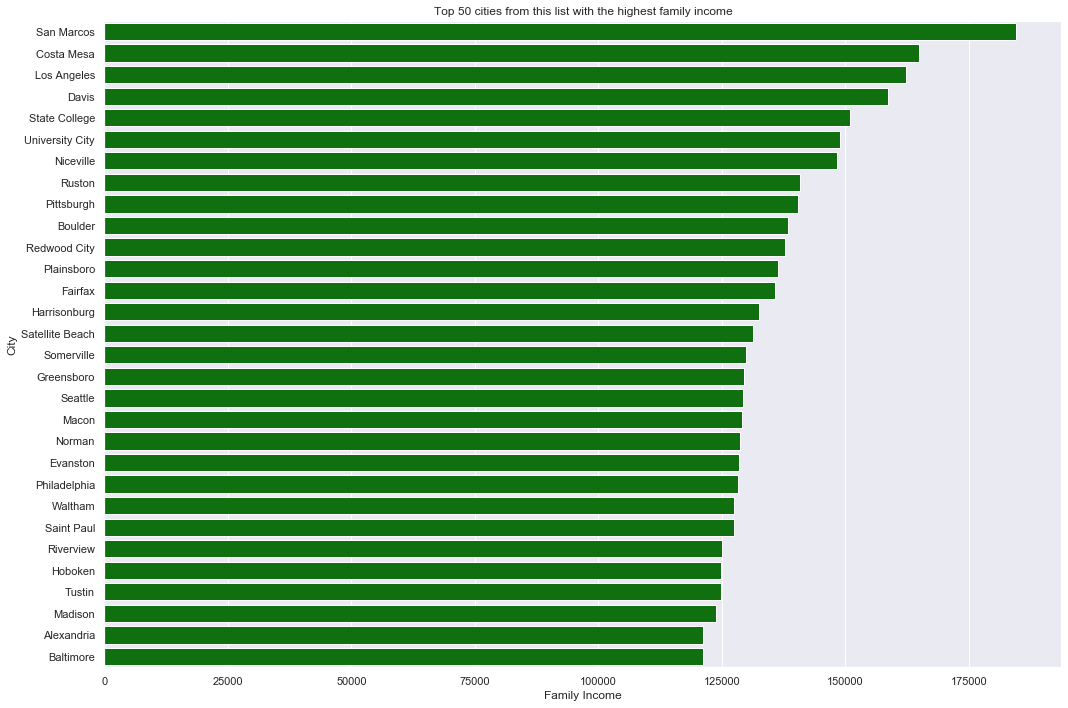

In [37]:
plt.figure(figsize=(15,10))
sns.set()
sns.barplot(x=target_cities['family_mean'].sort_values(ascending=False).head(30),y=target_cities.head(30).\
        index,color='green')
plt.xlabel('Family Income')
plt.ylabel('City')
plt.title("Top 50 cities from this list with the highest family income")
plt.tight_layout()
plt.show()

In [38]:
re_data.groupby('state').mean()['pct_own'].sort_values(ascending=False)

state
Vermont                 0.741386
Maine                   0.737277
Iowa                    0.730601
Minnesota               0.726376
West Virginia           0.720047
New Hampshire           0.714810
Michigan                0.714213
South Dakota            0.710255
Wyoming                 0.710194
Utah                    0.708416
Montana                 0.704104
Delaware                0.699846
North Dakota            0.699710
Pennsylvania            0.699412
Maryland                0.695255
Connecticut             0.693166
New Mexico              0.689149
Nebraska                0.686798
Indiana                 0.685232
Kansas                  0.684527
Idaho                   0.680492
Alabama                 0.680364
Wisconsin               0.680239
South Carolina          0.676580
Kentucky                0.673032
Missouri                0.668337
Mississippi             0.668112
Tennessee               0.667701
Ohio                    0.665785
Arkansas                0.662607
Virg